In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import math

np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'retina'

In [51]:
df = pd.read_excel('ConnectGPT (Responses).xlsx')

In [52]:
df.shape

(52, 16)

In [53]:
df.head()

,Timestamp,Select Your Age Range,What gender do you identify with?,Are you currently a student?,What platforms do you currently use for networking?,How frequently do you engage in networking activities or attend networking events?,How easy or difficult is it for you to find connections with common interests at networking events?,"When it comes to preparing for networking events and managing your meetings, how easy or hard do you find the current tools and resources available to you?",How challenging is it for you to obtain post-meeting insights and follow up with your networking connections after initial meetings?,"How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?","How important is a feature that suggests efficient scheduling options, such as an integrated calendar for one-on-one or group networking events, to make connecting with your matches convenient on the platform?","How important is a feature that provides AI-generated insights, automatically creating meeting summaries, emphasizing crucial points, and suggesting follow-up actions after each meeting? This feature aims to simplify post-meeting tasks and enhance the value of your connections.",Rate the features you value the most in a professional networking app? (Please scroll to right if you are unable to see three ranking options) [Deep profile matching for personalized recommendation],Rate the features you value the most in a professional networking app? (Please scroll to right if you are unable to see three ranking options) [Ability to schedule and conduct 1:1 meetings on the app],Rate the features you value the most in a professional networking app? (Please scroll to right if you are unable to see three ranking options) [AI-powered meeting note recording and summarization],How much are you willing to pay per month for a personalized networking experience?
0,2023-11-08 12:44:20.636,25-45,FTMBA,Yes-Full Time,Linkedin,Monthly,3,2,2,5.0,5.0,5.0,NaN,Ability to schedule and conduct 1:1 meetings o...,NaN,$10-$20
1,2023-11-08 13:14:48.366,25-45,Others,Not a student,"Linkedin, Meetup, Blind",Rarely,3,3,3,3.0,2.0,4.0,NaN,Deep profile matching for personalized recomme...,NaN,<$5
2,2023-11-08 13:35:54.094,25-45,Others,Not a student,Linkedin,Rarely,2,2,4,4.0,3.0,5.0,NaN,AI-powered meeting note recording and summariz...,NaN,$5-$10
3,2023-11-08 17:42:18.884,25-45,FTMBA,Yes-Full Time,Linkedin,"Monthly, Weekly",4,4,3,5.0,5.0,5.0,NaN,Ability to schedule and conduct 1:1 meetings o...,NaN,$5-$10
4,2023-11-08 17:48:22.577,20-25,Others,Yes-Full Time,Linkedin,Monthly,4,2,3,5.0,4.0,4.0,NaN,Ability to schedule and conduct 1:1 meetings o...,NaN,$5-$10


In [54]:
df.columns

Index(['Timestamp', 'Select Your Age Range',
       'What gender do you identify with?', 'Are you currently a student?',
       'What platforms do you currently use for networking?',
       'How frequently do you engage in networking activities or attend networking events?',
       'How easy or difficult is it for you to find connections with common interests at networking events?',
       'When it comes to preparing for networking events and managing your meetings, how easy or hard do you find the current tools and resources available to you?',
       'How challenging is it for you to obtain post-meeting insights and follow up with your networking connections after initial meetings?',
       'How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?',
       'How important is a feature that suggests efficient scheduling options, such as an integrated calendar for one-on-one or group networking events, to mak

[Text(0.5, 0, 'How important are the features of connectGPT?'),
 Text(0, 0.5, 'Count')]

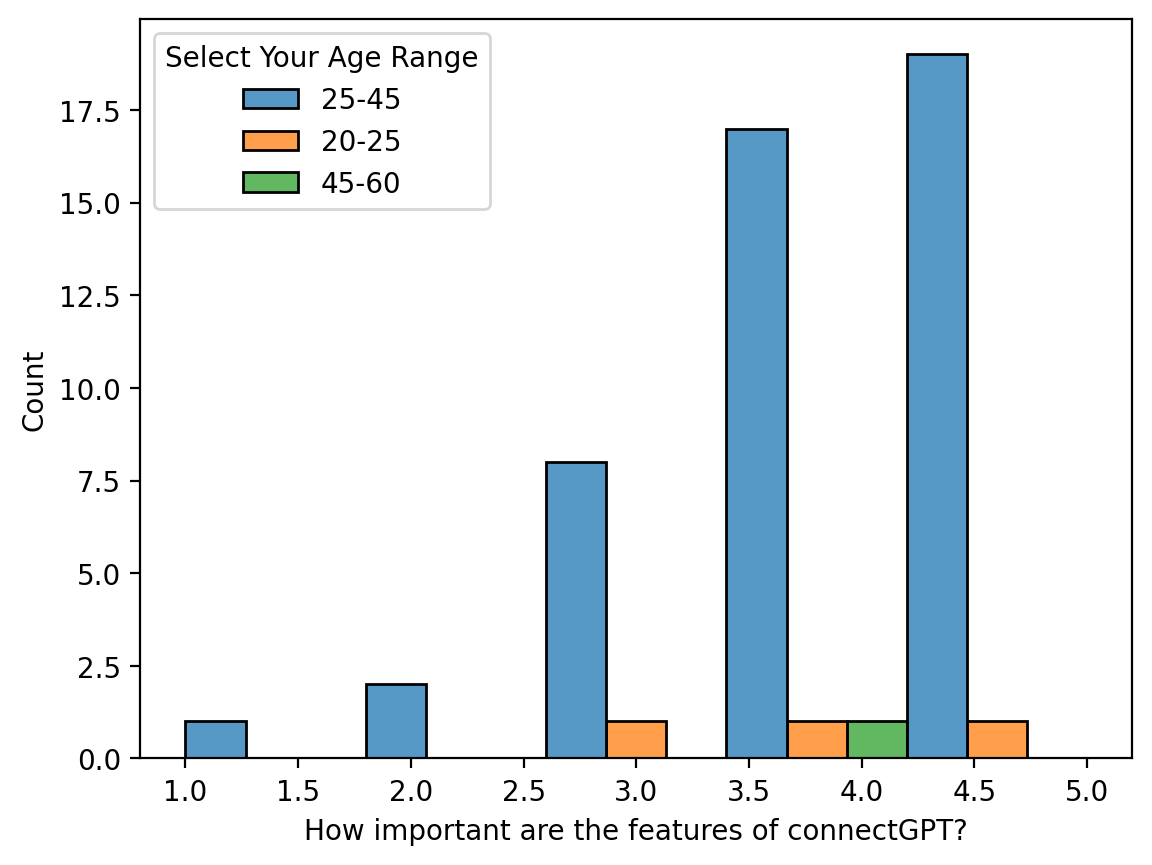

In [55]:
ax = sns.histplot(data=df, 
             x="How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?", 
             hue='Select Your Age Range', 
             bins=5, 
             multiple="dodge")
ax.set(xlabel='How important are the features of connectGPT?', ylabel='Count')

In [56]:
df[['Select Your Age Range','How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?']].groupby(['Select Your Age Range']).mean()

,"How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?"
Select Your Age Range,
20-25,4.000000
25-45,4.085106
45-60,4.000000


[Text(0.5, 0, 'How important are the features of connectGPT?'),
 Text(0, 0.5, 'Count')]

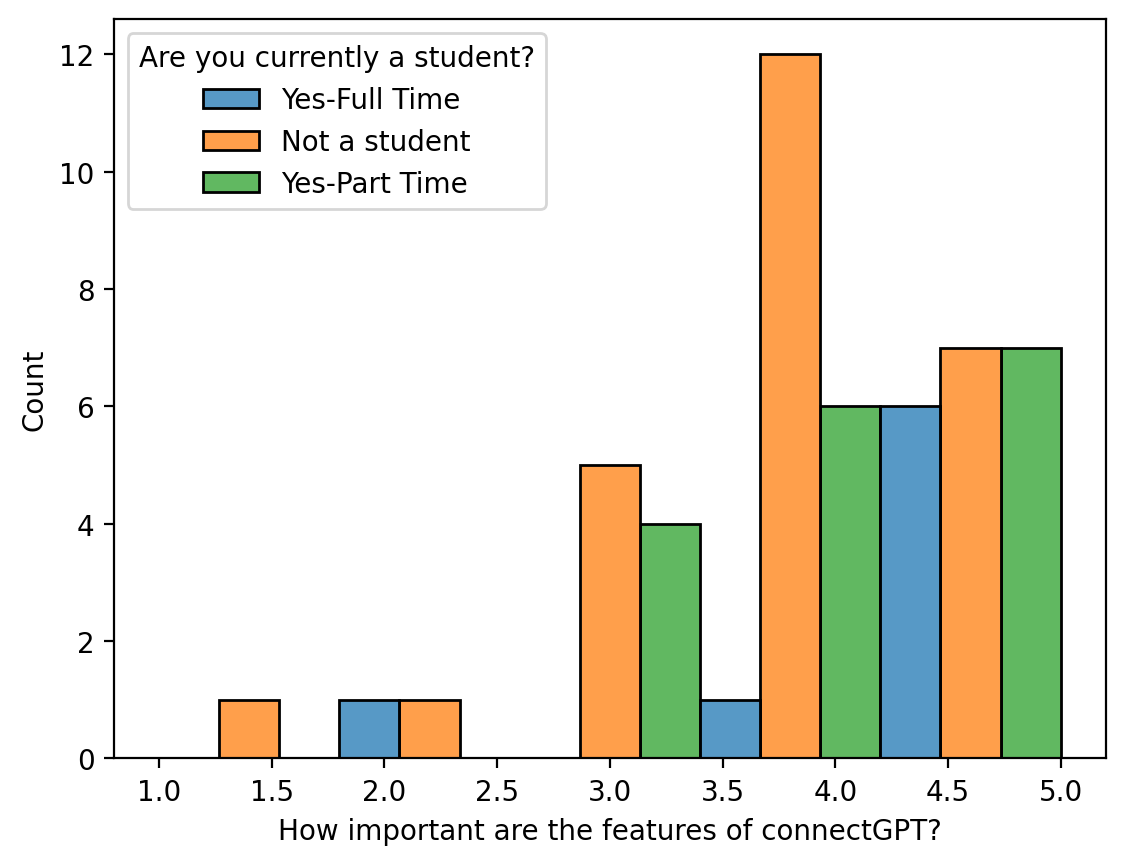

In [57]:
ax = sns.histplot(data=df, 
             x="How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?", 
             hue='Are you currently a student?', 
             bins=5, 
             multiple="dodge")
ax.set(xlabel='How important are the features of connectGPT?', ylabel='Count')

In [58]:
df[['Are you currently a student?','How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?']].groupby(['Are you currently a student?']).mean()

,"How important is a feature that suggests relevant networking connections based on your background, skills, interests, and career goals?"
Are you currently a student?,
Not a student,3.884615
Yes-Full Time,4.500000
Yes-Part Time,4.176471


[Text(0.5, 0, 'WTP'), Text(0, 0.5, 'Count')]

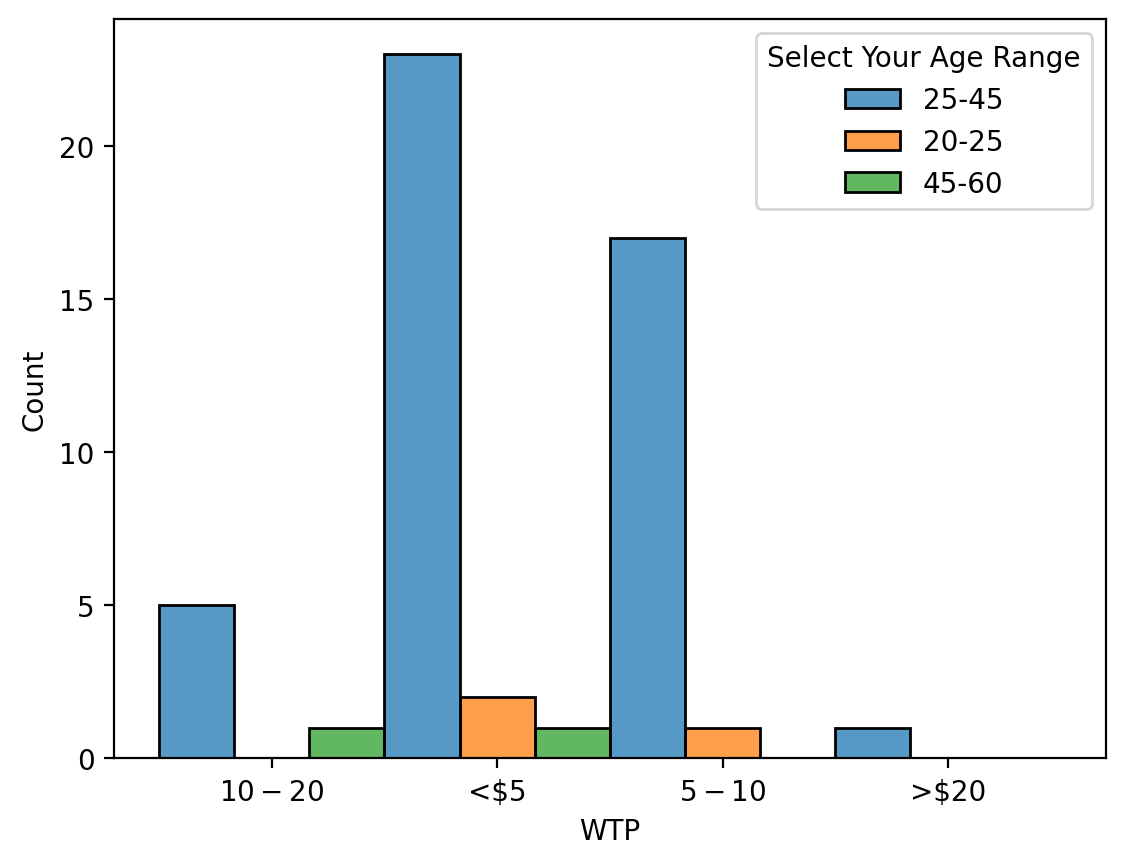

In [59]:
ax = sns.histplot(data=df, 
             x="How much are you willing to pay per month for a personalized networking experience?", 
             hue='Select Your Age Range', 
             bins=4, 
             multiple="dodge")
ax.set(xlabel='WTP', ylabel='Count')

In [60]:
pd.crosstab(df['How much are you willing to pay per month for a personalized networking experience?'],
            df['Select Your Age Range'], 
            normalize=False, margins=True)

Select Your Age Range,20-25,25-45,45-60,All
How much are you willing to pay per month for a personalized networking experience?,,,,
$10-$20,0,5,1,6
$5-$10,1,17,0,18
<$5,2,23,1,26
>$20,0,1,0,1
All,3,46,2,51
